# Autoregressive Models

## Imports

In [34]:
import sys
sys.path.insert(0, '../src/')

%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

from utils import load_pkl, generate_times
import seaborn as sns; sns.set()

## Loading Data

### Contour Iris

In [35]:
contour_iris = gpd.read_file(
    '../datasets/iris/iris.shp')

convert_to_int = ['dep', 'insee_com', 'iris', 'code_iris']
for col in convert_to_int:
    contour_iris[col] = contour_iris[col].astype(int)

contour_iris = contour_iris[['code_iris', 'geometry', 'dep']]
contour_iris.head()

,code_iris,geometry,dep
0,780770000,"POLYGON ((1.70653576799853 48.68592899673919, ...",78
1,780890000,"POLYGON ((1.546055957629441 48.99188386513938,...",78
2,775180000,"POLYGON ((2.58363128687007 48.47823349256925, ...",77
3,780840000,"POLYGON ((1.804690522672066 48.81030572032833,...",78
4,774960000,"POLYGON ((3.167690425227196 48.57734737074008,...",77


### Stations and Dates

In [36]:
station_data = pd.read_csv("../datasets/station_to_iris.csv")
station_data.describe()

,id,network_code,transporter_code,station_code,x,y,pricing_zone,validations_count,code_iris
count,40840.000000,40840.000000,40840.000000,4.084000e+04,40840.000000,40840.000000,40840.000000,4.084000e+04,4.084000e+04
mean,30803.832811,54.283766,76.406856,1.305072e+10,2.348372,48.820615,3.913810,2.005863e+04,8.628560e+08
std,17808.186584,84.565386,68.385835,1.487770e+10,0.243574,0.156552,1.642402,2.477972e+05,8.073858e+07
min,1.000000,1.000000,1.000000,1.000000e+00,1.477580,48.128804,1.000000,1.000000e+00,0.000000e+00
25%,15295.750000,1.000000,3.000000,5.100000e+02,2.228968,48.760363,3.000000,1.470000e+02,7.745801e+08
50%,30911.500000,10.000000,104.000000,3.116400e+04,2.346087,48.848857,4.000000,1.028000e+03,9.147101e+08
75%,46197.250000,66.000000,140.000000,3.001018e+10,2.488948,48.918595,5.000000,5.551250e+03,9.305503e+08
max,61575.000000,802.000000,203.000000,3.005028e+10,3.505865,49.222364,8.000000,2.166636e+07,9.569000e+08


In [37]:
stations_mode = load_pkl("../datasets/stations_mode.pkl")
subway_stations = [k for k, v in stations_mode.items() if v == 3]
print("Number of Subway stations: {}".format(len(subway_stations)))

Number of Subway stations: 303


In [38]:
dates = pd.date_range(start="2015-10-01", end="2015-12-31").date

### Discretized Matrices

In [39]:
matrix_6h = np.load("../datasets/6h_matrix.npy")
matrix_6h[:2]

array([[[2.37000e+02, 1.02760e+04, 6.01200e+03, 5.03100e+03],
        [6.80000e+01, 2.20000e+03, 2.24300e+03, 1.27300e+03],
        [4.20000e+01, 2.80500e+03, 1.11000e+03, 5.66000e+02],
        ...,
        [1.88000e+02, 6.95900e+03, 2.91200e+03, 1.56700e+03],
        [1.50000e+01, 7.54000e+02, 2.07100e+03, 9.25000e+02],
        [3.79700e+03, 1.07069e+05, 8.28230e+04, 7.33870e+04]],

       [[4.34000e+02, 1.01710e+04, 6.32700e+03, 4.86800e+03],
        [1.26000e+02, 2.32200e+03, 2.53800e+03, 1.40600e+03],
        [7.30000e+01, 2.87600e+03, 1.12900e+03, 6.31000e+02],
        ...,
        [2.79000e+02, 7.23900e+03, 3.00300e+03, 1.88500e+03],
        [8.60000e+01, 8.21000e+02, 2.01300e+03, 8.17000e+02],
        [5.07000e+03, 1.05533e+05, 9.22850e+04, 7.09610e+04]]])

In [40]:
data_matrix_6h = pd.Panel(matrix_6h, 
                         items=dates, 
                         major_axis=subway_stations, 
                         minor_axis=generate_times("6h")
                        )
data_matrix_6h.iloc[0].head()

,00:00:00,06:00:00,12:00:00,18:00:00
198,237.0,10276.0,6012.0,5031.0
223,68.0,2200.0,2243.0,1273.0
338,42.0,2805.0,1110.0,566.0
494,111.0,1566.0,1800.0,1708.0
897,430.0,1996.0,6523.0,6128.0


In [41]:
matrix_2h = np.load("../datasets/2h_matrix.npy")
print(matrix_2h[:2])

[[[7.8000e+01 1.1000e+01 1.4800e+02 ... 3.4140e+03 1.1620e+03 4.5500e+02]
  [2.2000e+01 0.0000e+00 4.6000e+01 ... 7.7000e+02 3.3800e+02 1.6500e+02]
  [4.0000e+00 0.0000e+00 3.8000e+01 ... 3.6000e+02 1.3100e+02 7.5000e+01]
  ...
  [3.2000e+01 0.0000e+00 1.5600e+02 ... 9.7200e+02 3.8000e+02 2.1500e+02]
  [1.5000e+01 0.0000e+00 0.0000e+00 ... 5.9900e+02 1.7800e+02 1.5000e+02]
  [1.5250e+03 1.4000e+01 2.2580e+03 ... 4.9450e+04 1.6018e+04 7.9240e+03]]

 [[2.6200e+02 2.0000e+00 1.7000e+02 ... 3.1890e+03 1.0880e+03 5.9200e+02]
  [7.5000e+01 4.0000e+00 4.7000e+01 ... 8.1300e+02 3.8500e+02 2.0800e+02]
  [4.1000e+01 0.0000e+00 3.2000e+01 ... 3.5400e+02 1.8400e+02 9.3000e+01]
  ...
  [1.0000e+02 0.0000e+00 1.7900e+02 ... 1.1530e+03 4.6300e+02 2.7000e+02]
  [8.3000e+01 1.0000e+00 2.0000e+00 ... 5.2400e+02 1.4900e+02 1.4400e+02]
  [2.7390e+03 7.0000e+00 2.3240e+03 ... 4.6150e+04 1.6508e+04 8.3080e+03]]]


In [42]:
data_matrix_2h = pd.Panel(matrix_2h, 
                         items=dates, 
                         major_axis=subway_stations, 
                         minor_axis=generate_times("2h")
                        )
data_matrix_2h.iloc[0].head()

,00:00:00,02:00:00,04:00:00,06:00:00,08:00:00,10:00:00,12:00:00,14:00:00,16:00:00,18:00:00,20:00:00,22:00:00
198,78.0,11.0,148.0,2614.0,6306.0,1357.0,1825.0,1409.0,2778.0,3414.0,1162.0,455.0
223,22.0,0.0,46.0,549.0,1246.0,405.0,523.0,546.0,1175.0,770.0,338.0,165.0
338,4.0,0.0,38.0,903.0,1549.0,354.0,351.0,283.0,477.0,360.0,131.0,75.0
494,95.0,1.0,15.0,273.0,922.0,372.0,469.0,443.0,888.0,1004.0,439.0,265.0
897,395.0,9.0,26.0,226.0,892.0,878.0,1831.0,1776.0,2916.0,2918.0,1374.0,1836.0


In [43]:
matrix_15m = np.load("../datasets/15m_matrix.npy")
print(matrix_2h[:2])

[[[7.8000e+01 1.1000e+01 1.4800e+02 ... 3.4140e+03 1.1620e+03 4.5500e+02]
  [2.2000e+01 0.0000e+00 4.6000e+01 ... 7.7000e+02 3.3800e+02 1.6500e+02]
  [4.0000e+00 0.0000e+00 3.8000e+01 ... 3.6000e+02 1.3100e+02 7.5000e+01]
  ...
  [3.2000e+01 0.0000e+00 1.5600e+02 ... 9.7200e+02 3.8000e+02 2.1500e+02]
  [1.5000e+01 0.0000e+00 0.0000e+00 ... 5.9900e+02 1.7800e+02 1.5000e+02]
  [1.5250e+03 1.4000e+01 2.2580e+03 ... 4.9450e+04 1.6018e+04 7.9240e+03]]

 [[2.6200e+02 2.0000e+00 1.7000e+02 ... 3.1890e+03 1.0880e+03 5.9200e+02]
  [7.5000e+01 4.0000e+00 4.7000e+01 ... 8.1300e+02 3.8500e+02 2.0800e+02]
  [4.1000e+01 0.0000e+00 3.2000e+01 ... 3.5400e+02 1.8400e+02 9.3000e+01]
  ...
  [1.0000e+02 0.0000e+00 1.7900e+02 ... 1.1530e+03 4.6300e+02 2.7000e+02]
  [8.3000e+01 1.0000e+00 2.0000e+00 ... 5.2400e+02 1.4900e+02 1.4400e+02]
  [2.7390e+03 7.0000e+00 2.3240e+03 ... 4.6150e+04 1.6508e+04 8.3080e+03]]]


In [44]:
data_matrix_15m = pd.Panel(matrix_15m, 
                         items=dates, 
                         major_axis=subway_stations, 
                         minor_axis=generate_times("15min")
                        )
data_matrix_15m.iloc[0].head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
198,38.0,20.0,13.0,3.0,1.0,0.0,3.0,0.0,2.0,3.0,...,93.0,81.0,61.0,52.0,67.0,72.0,58.0,48.0,53.0,45.0
223,8.0,1.0,6.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,...,16.0,32.0,18.0,29.0,39.0,14.0,32.0,16.0,14.0,3.0
338,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,11.0,10.0,7.0,10.0,12.0,14.0,3.0,15.0,4.0
494,31.0,27.0,21.0,9.0,7.0,1.0,0.0,0.0,0.0,0.0,...,65.0,23.0,37.0,43.0,33.0,21.0,48.0,21.0,37.0,26.0
897,161.0,110.0,75.0,38.0,8.0,0.0,3.0,0.0,2.0,1.0,...,151.0,166.0,143.0,194.0,180.0,223.0,314.0,303.0,289.0,192.0


## Preprocessing 

## Useful Plots

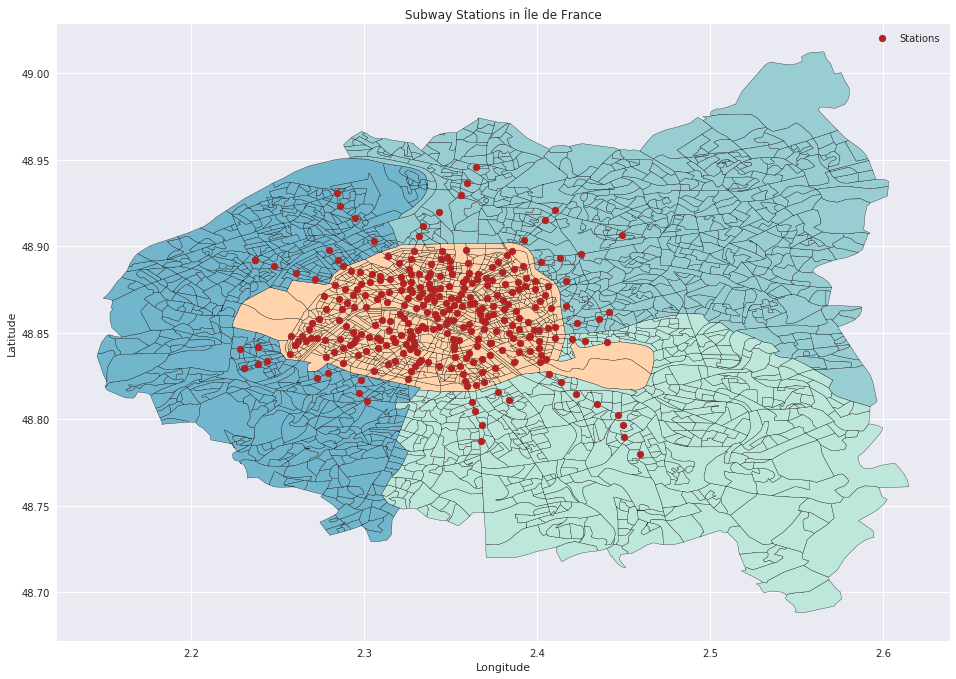

In [45]:
f, ax = plt.subplots(1, figsize=(16, 12))
ax = contour_iris[contour_iris['dep'].isin([75, 92, 93, 94])].plot(
    ax=ax, edgecolor='black', column='dep', cmap='icefire_r')
ax.scatter(station_data[station_data['id'].isin(subway_stations)]['x'],
           station_data[station_data['id'].isin(subway_stations)]['y'], color='firebrick', label='Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Subway Stations in Île de France')
ax.legend()

plt.show()

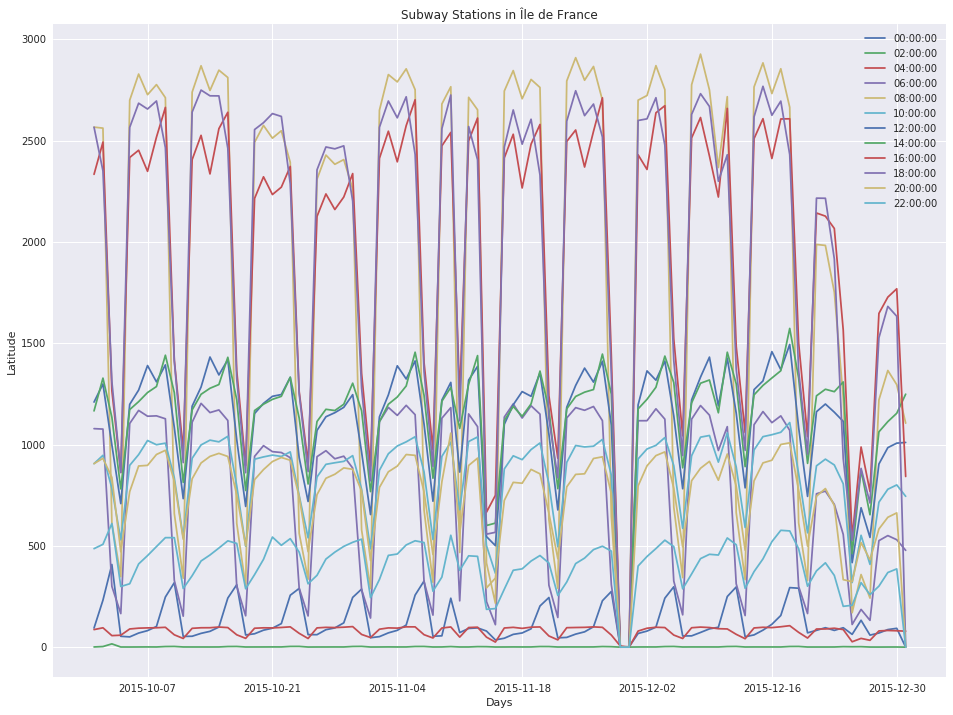

In [46]:
f, ax = plt.subplots(1, figsize=(16, 12))
ax = data_matrix_2h.mean().transpose().plot(ax=ax)
ax.set_xlabel('Days')
ax.set_ylabel('Latitude')
ax.set_title('Subway Stations in Île de France')
ax.legend()

plt.show()

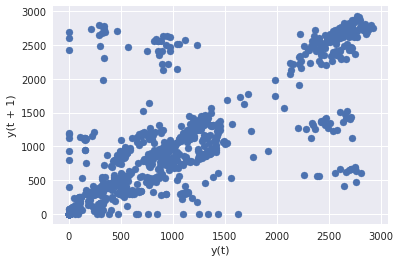

In [49]:
lag_plot(data_matrix_2h.mean().transpose())

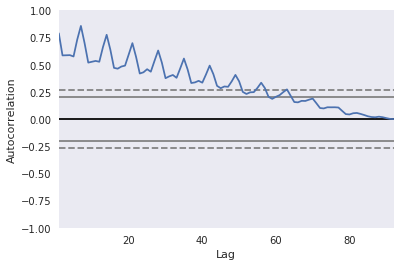

In [50]:
autocorrelation_plot(data_matrix_2h.mean().transpose())

## Models